# Data Analysis Assignment 1
**Due Date:** November 22, 2024, 1:00 PM  
**Total Points:** 85 + upto 15 Bonus points

## Copyright and Fair Use

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

## Guidelines

1. **DO NOT add or delete any cells (or modify cell IDs)**
2. Complete code cells marked with `# YOUR CODE HERE`
3. Comment or remove lines with `raise NotImplementedError()`
4. For multiple choice questions, set variables to `True` or `False`
5. Run all cells before submission to verify your solutions
6. Submit Notebook (.ipynb file) on Moodle with filename using the correct format, e.g., **Assignment_1_ManuGupta_12345678.ipynb**. Replace 12345678 by your matriculation number.

## Plagiarism

Plagiarism checks will be conducted on all submissions.\
If any plagiarism is identified, all students involved will receive 0 points for the entire submission, pending further clarification.

In [137]:
# Imports cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Configure plots
# For more details on plotting styles, see visualization_styles notebook: https://github.com/ai-mg/Data-Analysis-Tutorials-Python-Jupyter
sns.set()
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

The Intel Lab Data contains measurements from 54 sensors deployed in the Intel Berkeley Research laboratory. Each sensor (identified by moteid) measures:
- Temperature (°C)
- Humidity (%)
- Light (Lux)
- Voltage (V)

Dataset and further details:
- [Intel Lab Data](https://db.csail.mit.edu/labdata/labdata.html)

Raw data: **data.txt**\
Preprocessed data: **processed_sensor_data.csv**

First, let's load and examine the data:

In [210]:
# !!
# All analysis was made using the supplied data. 
# This task was done separately and checkt with test runs. Data is clean and usable. 
# !!
fpath = 'data.txt'
df = pd.read_csv(fpath, sep=" ", header=None, names=["date", "time", "epoch", "moteid", "temperature", "humidity", "light", "voltage"])

# combine date and time
df['datetime'] = df['date'] + ' ' + df['time']
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed', yearfirst=True)

# ---https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
df = df.dropna()
df = df.drop(columns=['epoch'])
df = df.drop(columns=['date'])
df = df.drop(columns=['time'])

# Define thresholds
temp_min = 10 #°C
temp_max = 30 #°C
hum_min = 30  #%
hum_max = 80  #%
light_min = 0 #Lux
light_max = 1200 #Lux
volt_min = 2  #V
volt_max = 3  #V

# Filter --- https://stackoverflow.com/questions/41625986/how-to-filter-out-specific-data-from-a-csv-via-python
filtered_data = df[
    (df['temperature'] >= temp_min)  & (df['temperature'] <= temp_max) &
    (df['humidity']    >= hum_min)   & (df['humidity']    <= hum_max) &
    (df['light']       >= light_min) & (df['light']       <= light_max) &
    (df['voltage']     >= volt_min)  & (df['voltage']     <= volt_max)
    ]

file_out = 'filtered_data.csv'
filtered_data.to_csv(file_out, index=False)

# sensor_data = pd.read_csv('filtered_data.csv')
# print(f"Number of records: {len(sensor_data):,}")
# sensor_data.head()

In [180]:
# Nothing to do here; just run the cell
# Load the data
sensor_data = pd.read_csv('processed_sensor_data.csv')
# Documentation on pandas.read_csv function: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

print("Loaded processed data summary:")
print(f"Time range: {sensor_data['datetime'].min()} to {sensor_data['datetime'].max()}")
print(f"Number of records: {len(sensor_data):,}")
print(f"Number of sensors: {sensor_data['moteid'].nunique()}")

sensor_data.head()

Loaded processed data summary:
Time range: 2004-02-28 01:06:16.480489 to 2004-04-05 11:02:32.715337
Number of records: 49,995
Number of sensors: 55


,datetime,moteid,temperature,humidity,light,voltage
0,2004-02-28 01:06:16.480489,33.0,18.9790,39.5860,101.20,2.69964
1,2004-02-28 01:07:16.983728,15.0,17.9500,42.2165,46.92,2.48502
2,2004-02-28 01:10:16.047784,14.0,17.8128,41.7133,28.52,2.69964
3,2004-02-28 01:10:16.539065,26.0,18.3616,42.2500,121.44,2.67532
4,2004-02-28 01:11:46.523191,16.0,17.0484,44.1504,18.40,2.62796


## Task 1.1: Initial Data Analysis (10 points)

Create a function `calculate_column_stats` that calculates basic statistics for a single sensor measurement column.

Required Statistics:
- Mean: Average value
- Median: Middle value (50th percentile)
- Standard deviation: Measure of spread
- Minimum: Lowest value
- Maximum: Highest value
- Q1: First quartile (25th percentile)
- Q3: Third quartile (75th percentile)

Hint:
1. Your function should take a pandas Series (single column) as input:
   ```python
   def calculate_column_stats(column: pd.Series) -> dict:
       stats = column.describe()  # Gets basic statistics
       return {
           'mean': stats['mean'],
           'median': stats['50%'],
           ...
       }

**Note:**
1. Use the dictionary keys exactly as below (for grading purpose):

'mean', 'median', 'std', 'min', 'max', 'q1', 'q3'


In [183]:
def calculate_column_stats(column: pd.Series) -> dict:
    """Calculate basic statistics for a sensor measurement column.
    
    Parameters
    ----------
    column : pd.Series
        Single column of sensor measurements
        
    Returns
    -------
    dict
        Dictionary containing statistics:
        - mean: average value
        - median: 50th percentile
        - std: standard deviation
        - min: minimum value
        - max: maximum value
        - q1: 25th percentile
        - q3: 75th percentile
    """
    stats = column.describe()
    #print(stats) debugging
    return {
        'mean': stats['mean'],
        'median': stats['50%'],
        'std': stats['std'],
        'min': stats['min'],
        'max': stats['max'],
        'q1': stats['25%'],
        'q3': stats['75%']
    }
    #raise NotImplementedError()

In [185]:
# Test cell - visible basic tests
test_data = pd.Series([20, 21, 22, 23, 24])
test_stats = calculate_column_stats(test_data)

assert isinstance(test_stats, dict), "Function must return a dictionary"
assert all(key in test_stats for key in ['mean', 'median', 'std', 'min', 'max', 'q1', 'q3']), \
    "Missing required statistics"

In [187]:
# Calculate and display statistics for each measurement
print("Temperature Statistics:")
print("-" * 20)
temp_stats = calculate_column_stats(sensor_data['temperature'])
for stat, value in temp_stats.items():
    print(f"{stat:>6}: {value:.2f}")

print("\nHumidity Statistics:")
print("-" * 20)
humid_stats = calculate_column_stats(sensor_data['humidity'])
for stat, value in humid_stats.items():
    print(f"{stat:>6}: {value:.2f}")

print("\nLight Statistics:")
print("-" * 20)
light_stats = calculate_column_stats(sensor_data['light'])
for stat, value in light_stats.items():
    print(f"{stat:>6}: {value:.2f}")

print("\nVoltage Statistics:")
print("-" * 20)
voltage_stats = calculate_column_stats(sensor_data['voltage'])
for stat, value in voltage_stats.items():
    print(f"{stat:>6}: {value:.2f}")

Temperature Statistics:
--------------------
  mean: 22.43
median: 21.25
   std: 5.68
   min: 13.56
   max: 40.00
    q1: 18.79
    q3: 23.99

Humidity Statistics:
--------------------
  mean: 42.86
median: 43.32
   std: 7.11
   min: 20.03
   max: 64.83
    q1: 38.60
    q3: 48.06

Light Statistics:
--------------------
  mean: 187.39
median: 101.20
   std: 242.30
   min: 0.00
   max: 964.16
    q1: 5.06
    q3: 264.96

Voltage Statistics:
--------------------
  mean: 2.53
median: 2.57
   std: 0.15
   min: 2.13
   max: 3.00
    q1: 2.41
    q3: 2.64


### Task 1.2: Data Visualization (20 points)

Create visualizations to explore the sensor data distributions. Your plots should show:
1. Distribution of each measurement (histogram) with smooth curves to identify patterns
2. Clear indication of thresholds for voltage levels
3. Proper labeling including units

Data Dictionary:
- temperature: Room temperature in °C (expected: 18-30°C)
- humidity: Relative humidity in % (expected: 20-80%)
- light: Illumination in Lux (expected: 0-1000 Lux)
- voltage: Battery voltage in V (optimal: >2.4V, critical: <2.2V)

Hints:
1. Create subplots using:
   ```python
   fig, axes = plt.subplots(2, 2, figsize=(15, 12))
   fig.suptitle('Sensor Measurements Distributions', fontsize=14)

2. For each measurement (using temperature as example):
   ```python
   # Get subplot
   ax = axes[0,0]
   
   # Create histogram
   ax.hist(data['temperature'], bins=50, density=True, alpha=0.7)
    
    # Add smooth curve
    counts, bins = np.histogram(data['temperature'], bins=50)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    ax.plot(bin_centers, counts/counts.sum(), 'r-', lw=2, 
           label='Distribution')

2. For voltage plot, add thresholds:
    ```Python
    ax = axes[1,1]
    # Plot histogram and curve as above

    # Add threshold lines
    ax.axvline(2.4, color='r', linestyle='--', 
          label='Warning (2.4V)')
    ax.axvline(2.2, color='darkred', linestyle='--', 
          label='Critical (2.2V)')
    ax.legend()

    plt.tight_layout()  # Adjust spacing between plots

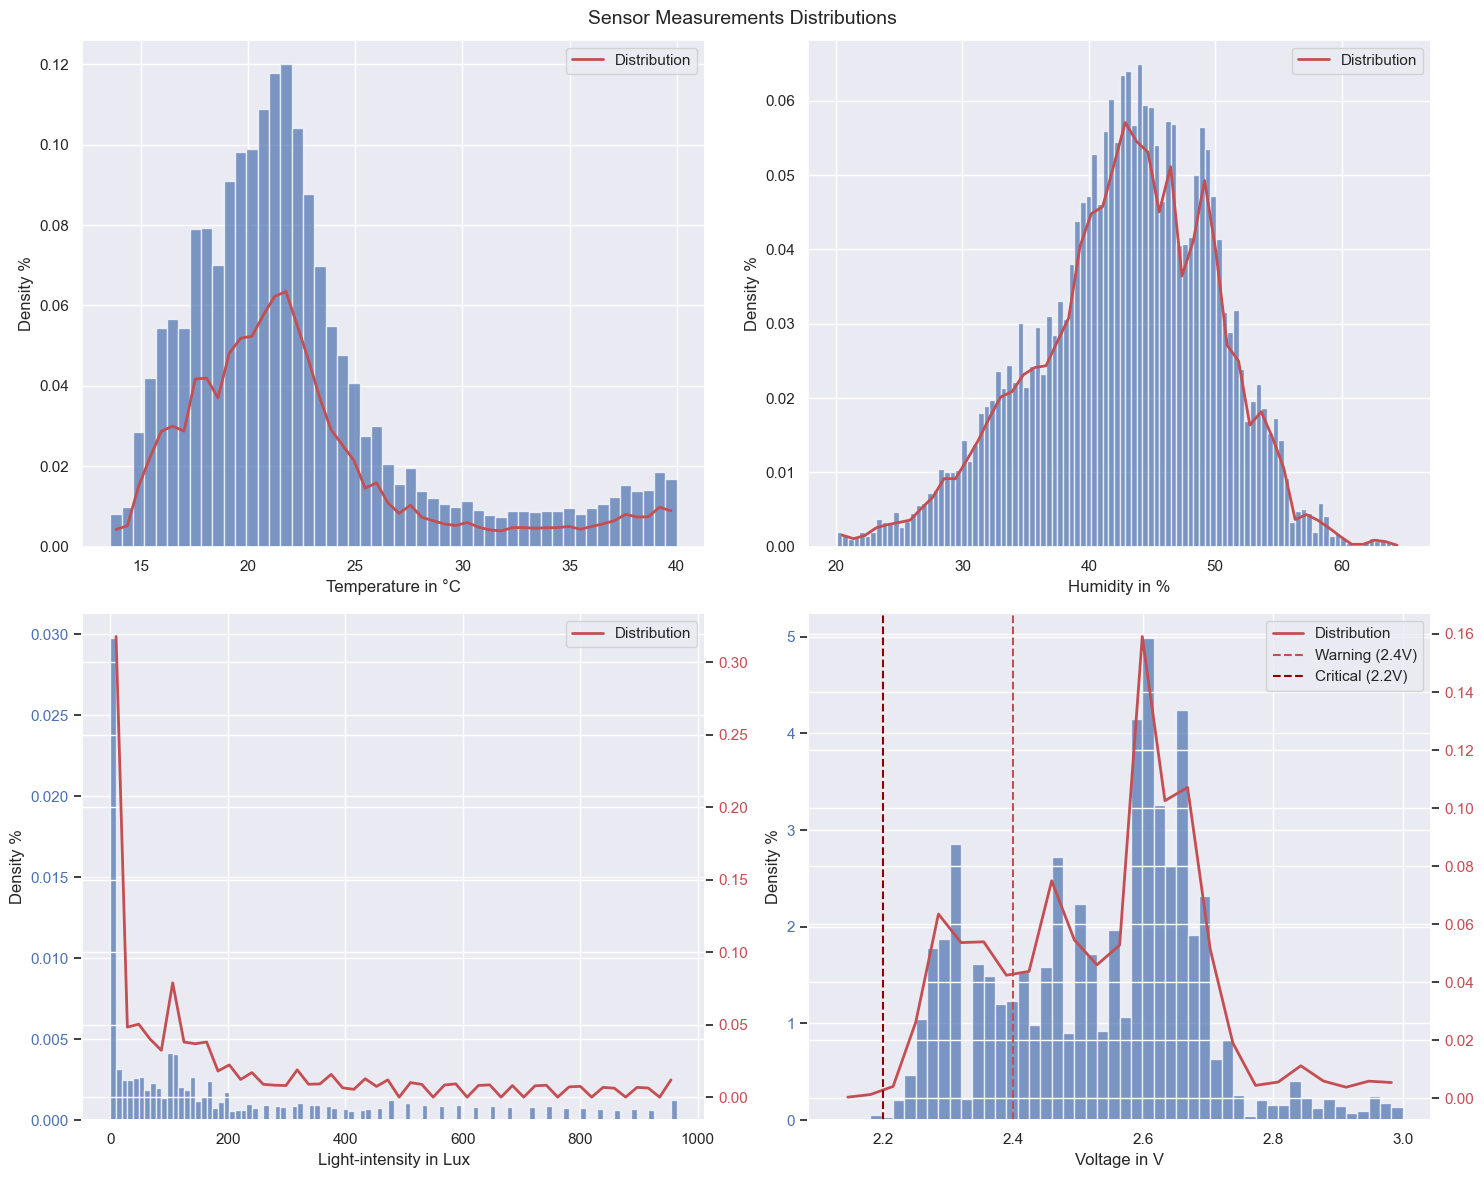

In [190]:
def create_distribution_plots(data: pd.DataFrame) -> plt.Figure:
    """Create distribution plots for all sensor measurements.
    
    Parameters
    ----------
    data : pd.DataFrame
        Sensor data
        
    Returns
    -------
    plt.Figure
        Figure containing the plots
    """
    # YOUR CODE HERE
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Sensor Measurements Distributions', fontsize=14)
    # Get subplot
    ax = axes[0,0]
    ax2 = axes[0,1]
    ax3 = axes[1,0]
    ax4 = axes[1,1]
    
    # Create histogram
    ax.hist(data['temperature'], bins=50, density=True, alpha=0.7)
    ax.set_xlabel('Temperature in °C')
    ax.set_ylabel('Density %')
    
    ax2.hist(data['humidity'], bins=100, density=True, alpha=0.7)
    ax2.set_xlabel('Humidity in %')
    ax2.set_ylabel('Density %')

    ax3.hist(data['light'], bins=100, density=True, alpha=0.7)
    ax3.set_xlabel('Light-intensity in Lux')
    ax3.tick_params(axis='y', labelcolor='b')
    ax3.set_ylabel('Density %')

    ax4.hist(data['voltage'], bins=50, density=True, alpha=0.7)
    ax4.set_xlabel('Voltage in V')
    ax4.tick_params(axis='y', labelcolor='b')
    ax4.set_ylabel('Density %')
    
    # Add smooth curve
    counts, bins = np.histogram(data['temperature'], bins=50)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    ax.plot(bin_centers, counts/counts.sum(), 'r-', lw=2, label='Distribution')
    ax.legend()
    
    counts2, bins2 = np.histogram(data['humidity'], bins=50)
    bin_centers2 = (bins2[:-1] + bins2[1:]) / 2
    ax2.plot(bin_centers2, counts2/counts2.sum(), 'r-', lw=2, label='Distribution')
    ax2.legend()

    ax3_2 = ax3.twinx()
    counts3, bins3 = np.histogram(data['light'], bins=50)
    bin_centers3 = (bins3[:-1] + bins3[1:]) / 2
    ax3_2.plot(bin_centers3, counts3/counts3.sum(), 'r-', lw=2, label='Distribution')
    ax3_2.tick_params(axis='y', labelcolor='r')
    ax3_2.legend()

    
    ax4_2 = ax4.twinx()
    counts4, bins4 = np.histogram(data['voltage'], bins=25)
    bin_centers4 = (bins4[:-1] + bins4[1:]) / 2
    ax4_2.plot(bin_centers4, counts4/counts4.sum(), 'r-', lw=2, label='Distribution')
    ax4_2.tick_params(axis='y', labelcolor='r')
    ax4_2.axvline(2.4, color='r', linestyle='--', 
      label='Warning (2.4V)')
    ax4_2.axvline(2.2, color='darkred', linestyle='--', 
          label='Critical (2.2V)')
    ax4_2.legend()
    
    plt.tight_layout()


create_distribution_plots(sensor_data)

### Task 1.3: Data Distribution Analysis (10 points)

Based on your analysis of the temperature and voltage distributions, answer these questions by setting variables to `True` or `False`. Consider both the statistical patterns and their real-world implications.

1) Temperature Distribution Characteristics (5 points):\
   a_) Shows a normal (Gaussian) distribution\
   b_) Shows a uniform distribution\
   c_) Contains significant outliers\
   d_) Shows multiple distinct peaks (multi-modal)\
   e_) Main temperature peak is around 20-22°C (typical indoor temperature)

2) Voltage Characteristics (5 points):\
   f_) All sensors maintained good battery levels (>2.4V)\
   g_) Shows three distinct voltage clusters or modes\
   h_) Most readings are in optimal range (>2.4V)\
   i_) Shows evidence of battery depletion (<2.2V)\
   j_) Voltage distribution suggests sensor maintenance is needed

Example of how to answer:
```python
# Temperature characteristics
a_ = False  # Not normal - shows clear multi-modal pattern
b_ = False  # Not uniform - has distinct peaks
c_ = True   # Clear outliers present, especially in higher range
d_ = True   # Multiple peaks visible (around 20°C and 35-40°C)
e_ = True   # Main concentration around typical room temperature

# Voltage characteristics
f_ = False  # Many readings below warning threshold of 2.4V
g_ = True   # Clear clusters around 2.3V, 2.4V, and 2.7V
h_ = False  # Significant portion below optimal range
i_ = True   # Some readings below critical 2.2V threshold
j_ = True   # Pattern suggests battery replacement needed
```
Hint: Consider these aspects when analyzing the distributions:

1. Shape and modality (single peak vs multiple peaks)
2. Plot line curve on top of histogram to see peaks

Note: Your answers should be justified by patterns visible in the histograms. Think about what each distribution tells you about the sensor network's health and operation.

there are:  107  out of  49995  datapoints below 2.2V


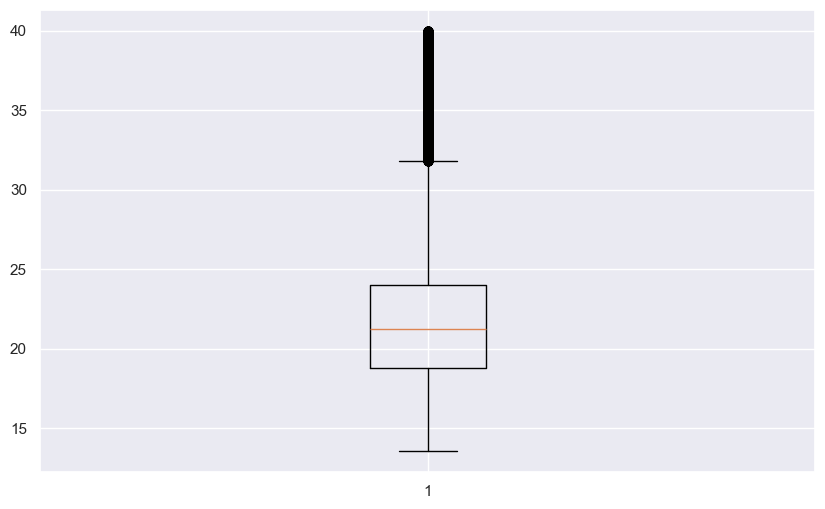

In [193]:
# Temperature characteristics
a_ = False  # Close to but not normal -> around 35-40 °C a second smaller peak is present
b_ = False  # Not uniform - has distinct peak(s)? 
plt.boxplot(sensor_data['temperature'])
c_ = True   # Outliers present in higher range 32 - 40 °C
d_ = True   # Multiple peaks visible at 20°C and around 35-40 °C a second smaller peak is present
e_ = True   # Main concentration around 20°C (typical room temperature)

# Voltage characteristics
f_ = False # ~25% of readings below 2.4V (warning threshold) 
g_ = True  # Clusters around 2.3V, 2.5V and 2.6V
#plt.boxplot(sensor_data['voltage'])
print("there are: ", (sensor_data['voltage']< 2.2).sum() , " out of ", sensor_data['voltage'].count()," datapoints below 2.2V")
h_ = False  # About 25% are below 2.4V
i_ = True  # ~0.2% of readings below 2.2V (critical threshold)
j_ = True  # Pattern suggests battery replacement needed -> below 2.4V considered as due for replacement

In [195]:
# Test cell - DO NOT MODIFY
for var in ['a_', 'b_', 'c_', 'd_', 'e_', 'f_', 'g_', 'h_', 'i_', 'j_']:
    assert var in locals(), f"Missing answer for {var}"
    assert isinstance(locals()[var], bool), f"Answer for {var} must be True or False"

## Task 2.1: Daily Patterns Analysis (15 points)

In this task, you'll analyze how sensor measurements vary throughout the day.

Steps:
1. Extract hour from datetime column using `data['datetime'].dt.hour`
2. Group data by hour and calculate statistics
3. Return results in specified format

Hint: Use pandas groupby operations:
```python
# Example grouping by hour
hourly_means = data.groupby(data['datetime'].dt.hour)[column].mean()
```

In [198]:
def analyze_daily_pattern(data: pd.DataFrame, column: str) -> dict:
    """Analyze measurement patterns by hour of day.
    
    Parameters
    ----------
    data : pd.DataFrame
        Sensor data with 'datetime' column
    column : str
        Column to analyze ('temperature' or 'humidity')
    
    Returns
    -------
    dict
        Dictionary with hourly statistics:
        - 'hour_means': Mean values by hour
        - 'hour_stds': Standard deviations by hour
    """
    # Make a copy to avoid modifying original
    data = data.copy()
    
    # Convert datetime to datetime type if it's string
    if isinstance(data['datetime'].iloc[0], str):
        data['datetime'] = pd.to_datetime(data['datetime'])

    # Extract hour
    data['hour'] = data['datetime'].dt.hour

    # Calculate means and standard deviation
    hourly_means = data.groupby('hour')[column].mean()
    hourly_stds = data.groupby('hour')[column].std()
    
    return {
        'hour_means': hourly_means.values,
        'hour_stds': hourly_stds.values,
        'hours': hourly_means.index.tolist()
    }

#print(analyze_daily_pattern(sensor_data, 'temperature'))

In [200]:
# Test cell - DO NOT MODIFY
test_results = analyze_daily_pattern(sensor_data, 'temperature')

# Basic tests
assert isinstance(test_results, dict), "Function must return dictionary"
assert 'hour_means' in test_results, "Missing hourly means"
assert 'hour_stds' in test_results, "Missing hourly standard deviations"
assert len(test_results['hour_means']) == 24, "Should have 24 hourly values"

print("Basic tests passed!")

Basic tests passed!


## Task 2.2: Plot Daily Patterns (25 points)

Create a visualization showing how measurements vary throughout the day.

Requirements:
1. Line plot showing mean values by hour
2. Shaded region showing ±1 standard deviation
3. Proper labels and title
4. Legend explaining the shaded region

Hint:
- Call analyze_daily_pattern function
```python
# Example of plotting with confidence interval
plt.plot(hours, means, label='Mean')
plt.fill_between(hours, means-stds, means+stds, alpha=0.3, label='±1 std')
```

In [203]:
def plot_daily_pattern(data: pd.DataFrame, column: str) -> plt.Figure:
    """Create line plot showing daily pattern with confidence interval.
    
    Parameters
    ----------
    data : pd.DataFrame
        Sensor data
    column : str
        Column to plot
        
    Returns
    -------
    plt.Figure
        Figure with daily pattern plot
    """
    if(column=='temperature'):
        unit = '°C'
    elif(column=='voltage'):
        unit = 'V'
    elif(column=='light'):
        unit = 'Lux'
    elif(column=='humidity'):
        unit = '%'
        
    data = data.copy()
    results = analyze_daily_pattern(data, column)

    figure, axes = plt.subplots()
    figure.suptitle('', fontsize=14)
    
    means = results['hour_means']
    stds = results['hour_stds']
    hours = results['hours']
    axes.plot(hours, means, 'r',label=('Mean '+column+' in '+unit))
    axes.fill_between(hours, means-stds, means+stds, color='orange', alpha=0.3, label='±1σ ... Standard deviation')
    axes.set_xlabel('Daytime by h')
    axes.set_ylabel(column+' in '+unit)
    axes.set_title('Daily pattern of '+column)
    axes.xaxis.set_ticks(np.arange(0, 24, 1))
    
    peak_idx = np.argmax(means)
    axes.plot(hours[peak_idx], means[peak_idx], 'ko')
    axes.text(hours[peak_idx]+hours[peak_idx]*0.01, means[peak_idx]+means[peak_idx]*0.01, f'Peak of {means[peak_idx]:.1f} {unit} at {peak_idx} h')
    
    axes.legend()
    #print("68.27% of data falls into the shaded area maked as \"±1 std\". As it represents the standard deviation of each meaned sample.")
    return{axes}

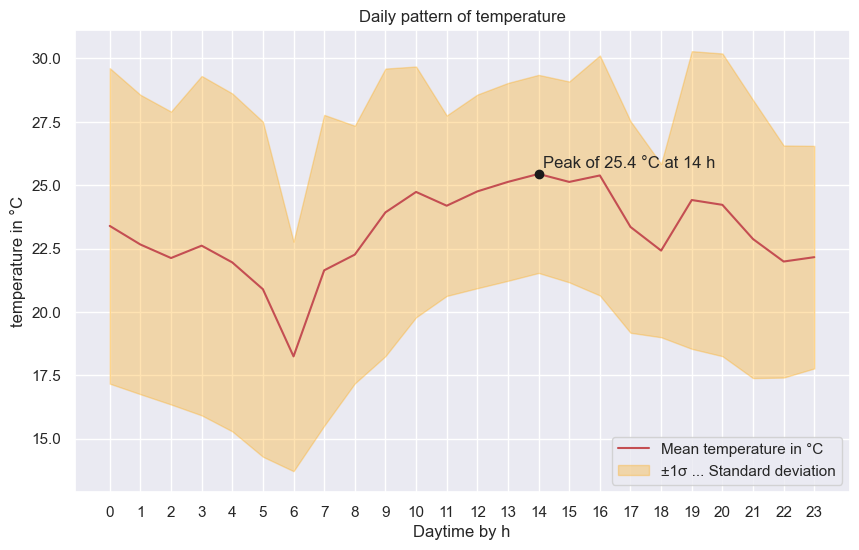

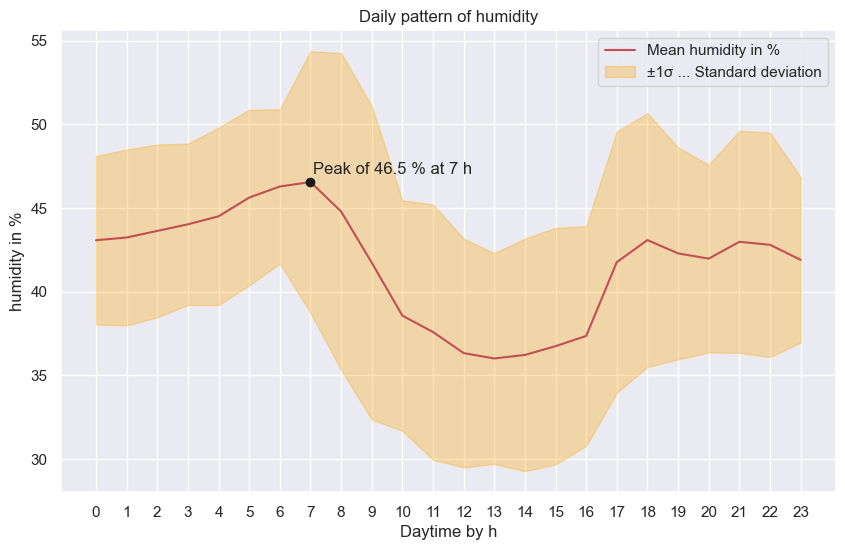

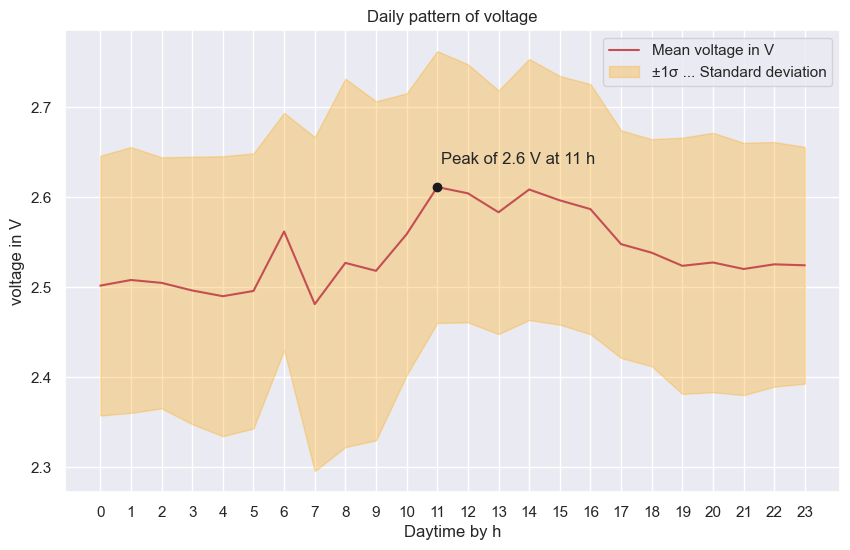

In [205]:
# Create plots for temperature and humidity
temp_fig = plot_daily_pattern(sensor_data, 'temperature')
humid_fig = plot_daily_pattern(sensor_data, 'humidity')
volt_fig = plot_daily_pattern(sensor_data, 'voltage')

## Task 2.3: Temperature and Humidity Daily Patterns (5 points)

Based on your plots of daily temperature and humidity patterns (from Task 2.2), answer these questions:

Temperature patterns in the lab show:\
a_) Highest temperatures in early morning (6-9 AM)\
b_) Highest temperatures in afternoon (2-5 PM)\

Humidity patterns show:\
c_) Highest levels in early morning hours\
d_) Highest levels during afternoon\
e_) Relatively constant levels throughout day

Example of how to answer:
```python
# Temperature peaks (set exactly one to True)
a_ = False  # Early morning peak
b_ = True   # Afternoon peak
c_ = False  # Night peak

# Humidity pattern (set exactly one to True)
d_ = True   # Morning peaks
e_ = False  # Afternoon peaks

In [208]:

a_ = False  # ...
b_ = True   # highest temperatur occurs at 14:00

# Humidity pattern
c_ = True  # highest humidity occurs at 07:00
d_ = False # ...
e_ = False # Humidity is not constant throughout the day

In [176]:
# Test cell - DO NOT MODIFY
for var in ['a_', 'b_', 'c_', 'd_', 'e_']:
    assert var in locals(), f"Missing answer for {var}"
    assert isinstance(locals()[var], bool), f"Answer for {var} must be True or False"

In [ ]:
# Do not create any new cells here